# Finding planets

## With Lightkurve
"A friendly Python package for making discoveries with Kepler & TESS."

Source: [lightkurve tutorials](https://docs.lightkurve.org/tutorials/index.html)

# 0. Import modules

In [1]:
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Search for Target Pixel Files

In [ ]:
# Search for "KIC 6922244": star with confirmed planet


# 2. Download Target Pixel Files
= Flexible Image Transport System

# 3. Convert to a light curve

# 4. Flatten the plot

# 5. Compute transit period

# 6. Fold the plot on 1 period

# Cheat code

In [ ]:
# 1. Search
search_result = lk.search_targetpixelfile("KIC 6922244")
search_result = lk.search_targetpixelfile("KIC 6922244", quarter=4)
search_result
search_result.table

# 2. Download
# quarter_idx = np.where(search_result.table['mission'] == 'Kepler Quarter 04')[0]
# search_result[quarter_index]
# tpf = search_result[quarter_idx].download()
tpf = search_result[3].download()
tpf_local = lk.read("core/assets/data/tess2020020091053-s0021-0000000001042868-0167-s_tp.fits")
tpf_local

# 2.1 Plot
tpf.plot(frame=0)
tpf.animate()

tpf.plot(aperture_mask=tpf.pipeline_mask)

# 3. Convert to lightcurve
lc = tpf.to_lightcurve(aperture_mask=tpf.pipeline_mask)
lc
lc.plot()
lc.scatter()

# 4. Flatten the plot
flat_lc = lc.flatten()
flat_lc.plot()

# 5. Compute transit period
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.5, 10, 0.001))
periodogram.plot()
best_fit_period = periodogram.period_at_max_power
print(f"Best fit period: {best_fit_period: .5f}")

# 6. Fold the plot on 1 period
folded_lc = flat_lc.fold(period=best_fit_period)
folded_lc.plot()
folded_lc.scatter()

# Optional: Remove nan values with
lc.remove_nans()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

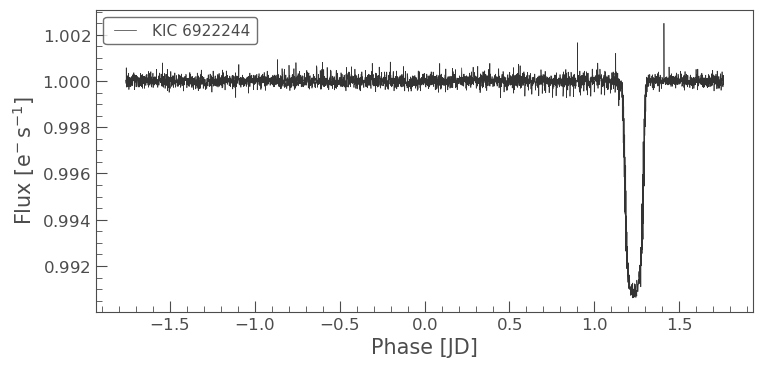

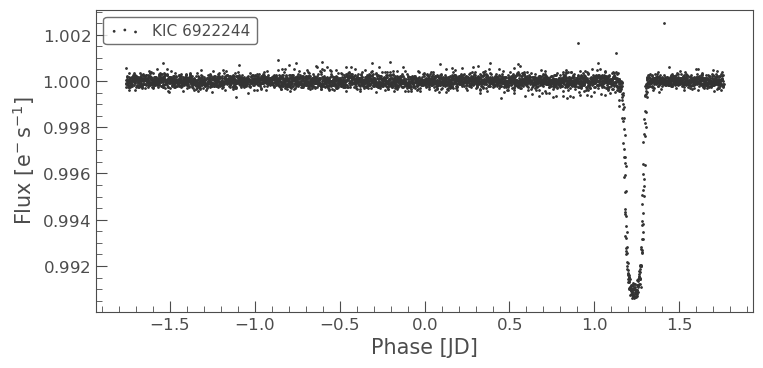